In [90]:
#Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib Inline

In [139]:
#Read data
df_titanic_train = pd.read_csv("E:\\SIMPLI__LEARN\\KAGGLE\\Titanic\\train.csv")
df_test = pd.read_csv("E:\\SIMPLI__LEARN\\KAGGLE\\Titanic\\test.csv")

In [140]:
df_titanic = pd.concat([df_titanic_train, df_test]).reset_index(drop=True)

In [141]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
df_titanic.shape

(1309, 12)

In [143]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [144]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [145]:
df_titanic.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [146]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Embarked

In [147]:
# Treating missing value in Embarked by Forward Fill
df_titanic.Embarked.ffill(inplace=True)

In [148]:
df_titanic['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

#### Age
Age column only has 20% Null Values and can be treated

In [149]:
df_titanic['Age'].isna().sum()/df_titanic.shape[0] *100

20.091673032849503

In [150]:
print("Median Age sep by Pclass",df_titanic.groupby('Pclass')['Age'].median())
print("--"*20)
print("Mean Age sep by Pclass",df_titanic.groupby('Pclass')['Age'].mean())
print('--'*20)
print("Median Age sep by Pclass & Sex",df_titanic.groupby(['Pclass', 'Sex'])['Age'].median())
print("--"*20)
print("Mean Age sep by Pclass & Sex",df_titanic.groupby(['Pclass', 'Sex'])['Age'].mean())

Median Age sep by Pclass Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64
----------------------------------------
Mean Age sep by Pclass Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64
----------------------------------------
Median Age sep by Pclass & Sex Pclass  Sex   
1       female    36.0
        male      42.0
2       female    28.0
        male      29.5
3       female    22.0
        male      25.0
Name: Age, dtype: float64
----------------------------------------
Mean Age sep by Pclass & Sex Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64


In [151]:
df_titanic['Age'] = df_titanic.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

In [152]:
df_test['Fare'] = df_test.groupby(['Pclass', 'Embarked'])['Fare'].apply(lambda x: x.fillna(x.mean()))

# EDA 

C:\Users\MOHOMMAD FAISAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


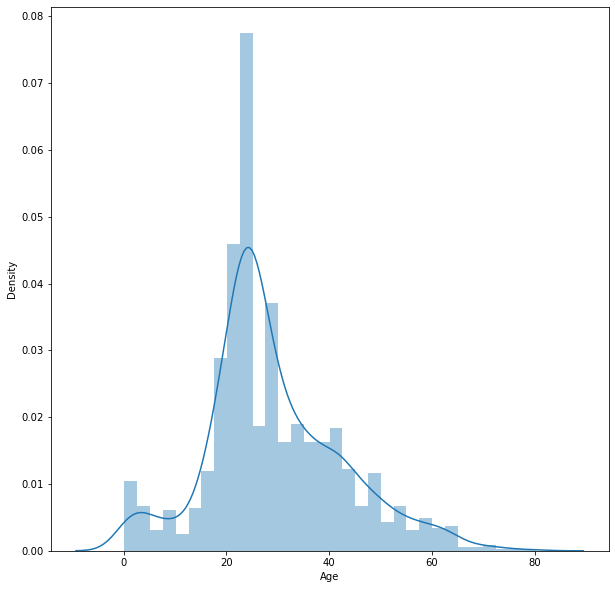

In [153]:
plt.figure(figsize=(10,10))
sns.distplot(df_titanic['Age'])
plt.show()

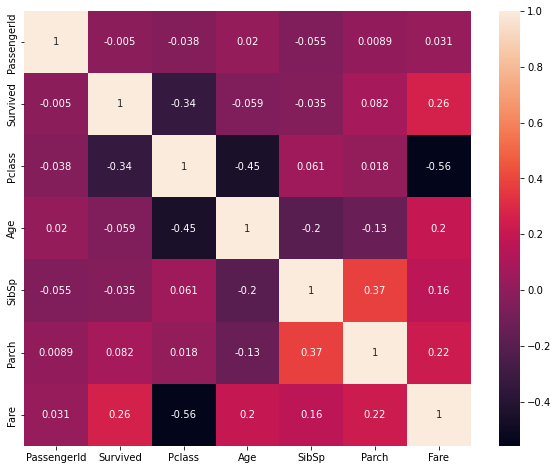

In [154]:
plt.figure(figsize=(10,8))
sns.heatmap(df_titanic.corr(), annot=True)
plt.show()

Text(0.5, 1.0, 'Survival rate for Age')

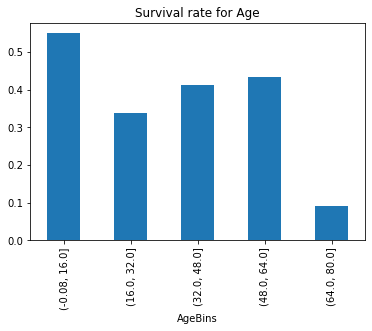

In [155]:
df_titanic['AgeBins'] = pd.cut(df_titanic["Age"].astype(int), 5)
# survival rate for Age
df_titanic[["AgeBins", 'Survived']].groupby('AgeBins')['Survived'].mean().plot(kind='bar')
plt.title("Survival rate for Age")

C:\Users\MOHOMMAD FAISAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


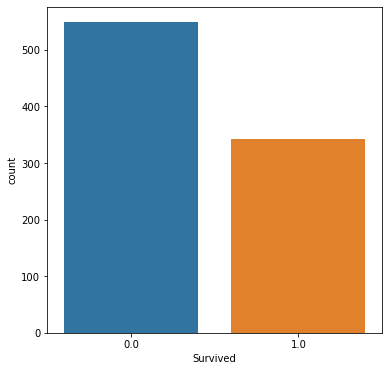

In [156]:
plt.figure(figsize=(6,6))
sns.countplot(df_titanic['Survived'])
plt.show()

Text(0.5, 1.0, 'Survival rate for Pclass')

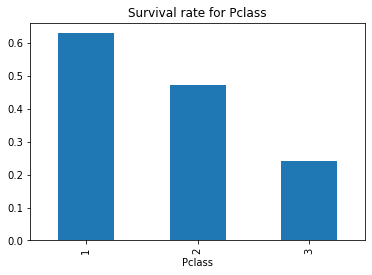

In [157]:
# Survival vs Pclass
df_titanic[["Pclass", 'Survived']].groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title("Survival rate for Pclass")

Text(0.5, 1.0, 'Survival rate for Sex')

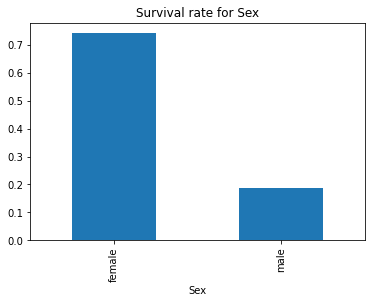

In [158]:
# Survival vs Sex
df_titanic[["Sex", 'Survived']].groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title("Survival rate for Sex")

In [159]:
# Treating Cabin Null values
df_titanic['Cabin'].isna().sum()/ df_titanic.shape[0] *100

77.46371275783041

In [160]:
# As Cabin column has more than 70%  Null values we'll drop the column
df_titanic.drop(columns=['Cabin'], inplace=True)

In [161]:
df_titanic['Age'] = df_titanic['Age'].astype(int)

<AxesSubplot:>

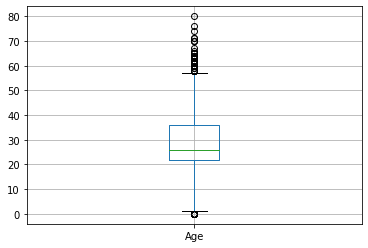

In [162]:
# Boxplot for Age
df_titanic.boxplot(column=['Age'])

<AxesSubplot:>

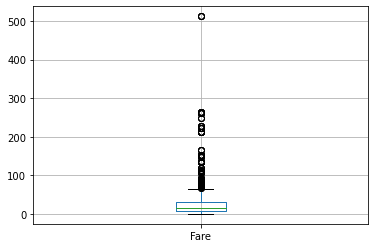

In [163]:
# BoxPlot for Fare
df_titanic.boxplot(column=['Fare'])

<AxesSubplot:>

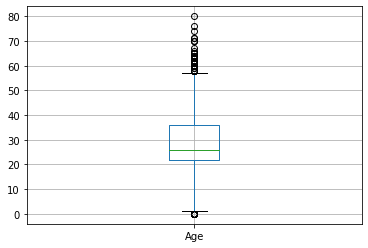

In [164]:
df_titanic.boxplot(column=['Age'])

In [165]:
# Adding two columns of sibllings and parents,with these variables add 1 
# (for each passer-by) to get the family size.
df_titanic['Family Size'] = df_titanic['SibSp'] + df_titanic['Parch'] + 1

<AxesSubplot:>

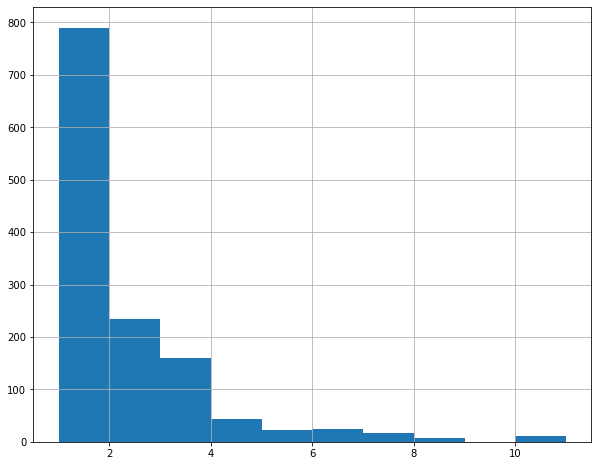

In [166]:
df_titanic['Family Size'].hist(figsize=(10,8))

In [167]:
df_titanic['FamilySizeBin'] = df_titanic['Family Size'].map(
    lambda s : 1 if s== 1 else(2 if s == 2 else(3 if 3<= s <= 4 else(4 if s >= 5 else(0)))))

Text(0.5, 1.0, 'Survival rate for FamilySizeBin')

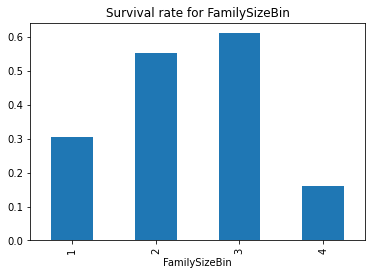

In [168]:
df_titanic[["FamilySizeBin", 'Survived']].groupby('FamilySizeBin')['Survived'].mean().plot(kind='bar')
plt.title("Survival rate for FamilySizeBin")

In [169]:
df_titanic['NameTitle'] = df_titanic['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_titanic['Married'] = 0
df_titanic['Married'].loc[df_titanic['NameTitle']=='Mrs'] = 1

C:\Users\MOHOMMAD FAISAL\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [170]:
df_titanic['NameTitle'].nunique()

18

In [171]:
title_names = (df_titanic['NameTitle'].value_counts() < 10)
df_titanic['NameTitle'] = df_titanic['NameTitle'].apply(lambda x : 'Miscl' if title_names.loc[x]== True else x)
df_titanic.groupby('NameTitle')['NameTitle'].count()

NameTitle
Master     61
Miscl      34
Miss      260
Mr        757
Mrs       197
Name: NameTitle, dtype: int64

In [172]:
# import string
import string

# function to extract surname from name
def extract_surname(x):
    families = []
    for i in range(len(x)):
        name = x.iloc[i]
        if '(' in name:
            no_bracket =  name.split('(')[0]
        else:
            no_bracket = name
        family = no_bracket.split(',')[0]
        title = no_bracket.split(',')[1].strip().split(' ')[0]
        for s in string.punctuation:
            family = family.replace(s, '').strip()
        families.append(family)
    return families
df_titanic['Family'] = extract_surname(df_titanic['Name'])

In [173]:
df_titanic['Family'].nunique()

875

In [174]:
df_titanic[['NameTitle', 'Survived', "Family Size"]].groupby('NameTitle').mean()

,Survived,Family Size
NameTitle,,
Master,0.575000,4.426230
Miscl,0.444444,1.441176
Miss,0.697802,2.169231
Mr,0.156673,1.442536
Mrs,0.792000,2.492386


## Survival of families of Women

<AxesSubplot:>

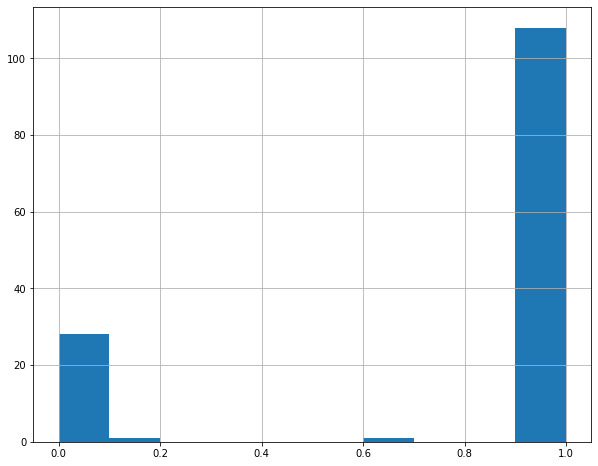

In [175]:
df_titanic.loc[(df_titanic['Sex'] == 'female') & (df_titanic['Family Size'] > 1)].groupby(
    'Family')['Survived'].mean().hist(figsize=(10,8))

So as we have seen that in women with a family size of 2 or more, survived.

Most often all of them or none of them died.

<AxesSubplot:>

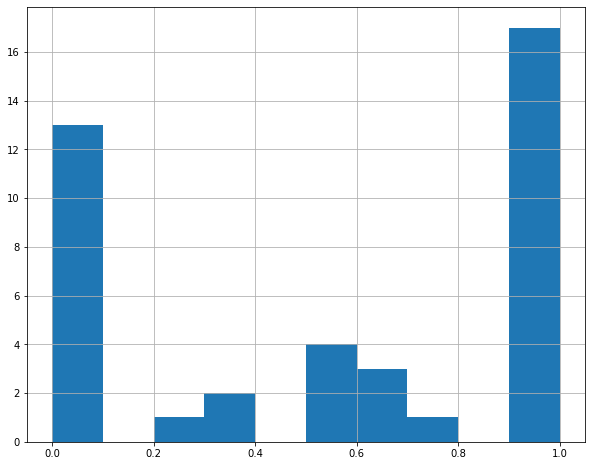

In [176]:
master_families = df_titanic.loc[df_titanic['NameTitle'] == "Master"]['Family'].tolist()
df_titanic.loc[(df_titanic['Family'].isin(master_families))].groupby(
    'Family')['Survived'].mean().hist(figsize=(10,8))

## Label Encoder
Encoding non numeric data into numeric using OneHotEncoding

In [177]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

non_numeric = ['Embarked', 'Sex', 'Age', 'NameTitle', 'Fare']
for features in non_numeric:
    df_titanic[features] = LabelEncoder().fit_transform(df_titanic[features])

In [178]:
categ_feature = ['Pclass', 'Embarked', 'Sex', 'Age', 'NameTitle', 'Fare', 'FamilySizeBin']

encoded_features = []
for feature in categ_feature:
    encoded_feat = OneHotEncoder().fit_transform(df_titanic[feature].values.reshape(-1, 1)).toarray()
    n = df_titanic[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n+1)]
    encoded_df = pd.DataFrame(encoded_feat, columns=cols)
    encoded_df.index = df_titanic.index
    encoded_features.append(encoded_df)
df_titanic = pd.concat([df_titanic, *encoded_features], axis=1)


In [179]:
df_titanic['Ticket_freq'] = df_titanic.groupby('Ticket')['Ticket'].transform('count')

In [180]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare',
       ...
       'Fare_278', 'Fare_279', 'Fare_280', 'Fare_281', 'Fare_282',
       'FamilySizeBin_1', 'FamilySizeBin_2', 'FamilySizeBin_3',
       'FamilySizeBin_4', 'Ticket_freq'],
      dtype='object', length=390)

In [181]:
# Dividing training and testing
def divide_df(data):
    return data.loc[:890], data.loc[891:].drop(['Survived'], axis=1)

In [246]:
df_train, df_test = divide_df(df_titanic)

In [247]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_278,Fare_279,Fare_280,Fare_281,Fare_282,FamilySizeBin_1,FamilySizeBin_2,FamilySizeBin_3,FamilySizeBin_4,Ticket_freq
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,20,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,237,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,50,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,217,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35,0,0,373450,52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [248]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Columns: 389 entries, PassengerId to Ticket_freq
dtypes: category(1), float64(372), int32(3), int64(10), object(3)
memory usage: 1.2+ MB


In [249]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 390 entries, PassengerId to Ticket_freq
dtypes: category(1), float64(373), int32(3), int64(10), object(3)
memory usage: 2.6+ MB


# Modelling and Prediction

In [250]:
from sklearn.preprocessing import StandardScaler

In [253]:
#Define columns which can be dropped for the modelling part because we created new label and one hot encoded variants out of them
drop_cols= ['Embarked', 'Family', 'Family Size', 'FamilySizeBin','PassengerId',
            'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',  'NameTitle', 'AgeBins']
drop_col_2 =['Embarked', 'Family', 'Family Size', 'FamilySizeBin','PassengerId',
            'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',  'NameTitle', 'AgeBins']

In [254]:
y= df_train['Survived'].values
X = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))

In [255]:
X.shape

(891, 376)

In [256]:
X_test1 = StandardScaler().fit_transform(df_test.drop(columns=drop_col_2))

In [257]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [258]:
X_test1.shape

(418, 376)

In [259]:
X_train.shape

(623, 376)

In [260]:
X_test.shape

(268, 376)

In [261]:
X_test1.shape

(418, 376)

In [262]:
Y_train.shape

(623,)

In [263]:
# Training Model
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [266]:
# Predicting Value
from sklearn import metrics

rfc_pred = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, rfc_pred)))

Accuracy_Score = 1.0


In [267]:
print(metrics.confusion_matrix(y_test, rfc_pred))
print(metrics.classification_report(y_test,rfc_pred))

[[162   0]
 [  0 106]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       162
         1.0       1.00      1.00      1.00       106

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



In [273]:
prediction = rfc.predict(X_test1)
op_survived = pd.DataFrame({"PassengerID": df_test.PassengerId, "Survived": prediction})
op_survived['Survived'] = op_survived['Survived'].astype(int)
op_survived.to_csv('E:\\SIMPLI__LEARN\\KAGGLE\\Titanic\\predt_survival_titanic.csv', index=False)

# Comparing with other models

In [268]:
## Checking accuracy score with other models
# ---------------- Classifiers -------------------------------------- #

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [269]:
classification_models = []
classification_models.append(('Logistic Regression', LogisticRegression(solver="liblinear")))
classification_models.append(('K Nearest Neighbor', KNeighborsClassifier(n_neighbors=15,p=2,metric='euclidean')))
classification_models.append(('Kernel SVM', SVC(kernel = 'rbf',gamma='scale')))
classification_models.append(('Naive Bayes', GaussianNB()))
classification_models.append(('Decision Tree', DecisionTreeClassifier(criterion = "entropy")))
classification_models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion="entropy")))


In [270]:
for name, model in classification_models:
  skf = StratifiedKFold(n_splits=10)
  result = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
  print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100 , result.std()*100))

Logistic Regression: Mean Accuracy = 100.00% - SD Accuracy = 0.00%
K Nearest Neighbor: Mean Accuracy = 75.53% - SD Accuracy = 4.07%
Kernel SVM: Mean Accuracy = 89.90% - SD Accuracy = 2.71%
Naive Bayes: Mean Accuracy = 90.57% - SD Accuracy = 2.95%
Decision Tree: Mean Accuracy = 100.00% - SD Accuracy = 0.00%
Random Forest: Mean Accuracy = 99.66% - SD Accuracy = 0.72%
